# HSV colorspace

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in RGB image

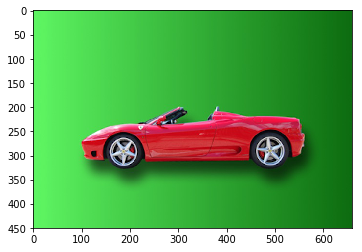

In [3]:
# Read in the image
image = mpimg.imread('images/car_green_screen2.jpg')

plt.imshow(image)

### RGB threshold 

Visualize the green threshold you defined in the previous, consistent green color case.

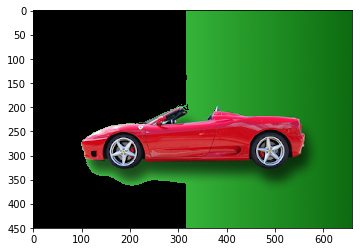

In [4]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Convert to HSV

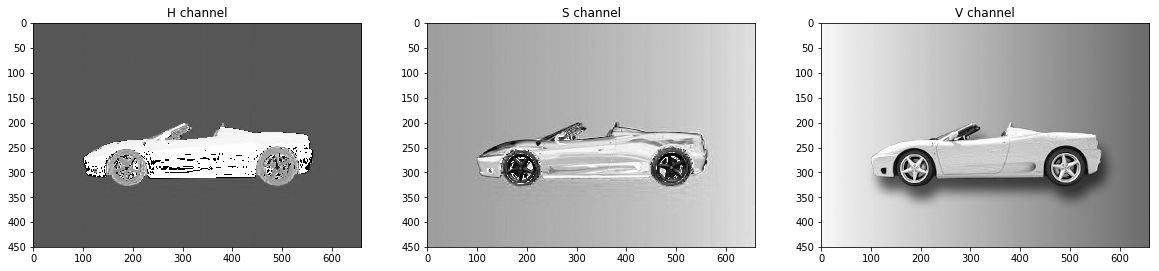

In [5]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

### Mask the green area using HSV color space

(450, 660)
(450, 660, 3)


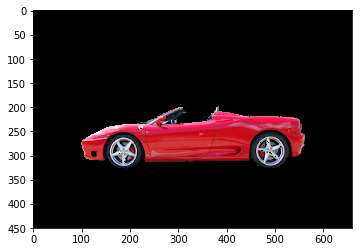

In [36]:
## Define the color selection boundaries in HSV values
low_h = np.array([50])
high_h = np.array([70])
## Define the masked area and mask the image
mask_image = cv2.inRange(h,low_h,high_h)
# Don't forget to make a copy of the original image to manipulate
HSV_image = np.copy(hsv)
plt.imshow(mask_image, cmap='gray')
print(mask_image.shape)
print(HSV_image.shape)
HSV_image[mask_image!=0]=0
image_rgb_masked = cv2.cvtColor(HSV_image, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb_masked)

(575, 1024, 3)
(450, 660, 3)


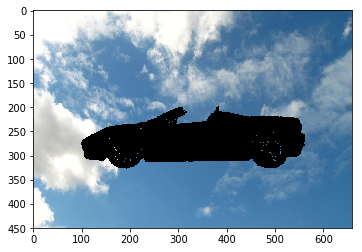

In [35]:
#Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
plt.imshow(background_image)
print(background_image.shape)
## Crop it or resize the background to be the right size (450x660)
image_resized = cv2.resize(background_image, (660,450))
print(image_resized.shape)
## Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
image_resized[mask_image == 0] = [0,0,0]
## Display the background and make sure 
plt.imshow(image_resized)

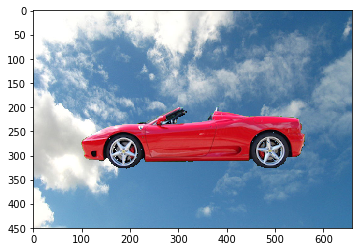

In [37]:
# Adding the two images together to create a complete image!
# complete_image = masked_image + image_resized
complete_image = image_rgb_masked + image_resized
plt.imshow(complete_image)